# Kecerdasan Komputasional

**Tiara Azzahra**

**220511001**

**TI22E**

# Judul: Klasifikasi Genre Musik Berdasarkan Fitur Audio Menggunakan ANN
Deskripsi Masalah:
Fitur audio musik seperti tempo, spektrum frekuensi, dan harmoni dapat digunakan untuk mengklasifikasikan genre musik. Buatlah model ANN untuk mengklasifikasikan genre musik ("Pop", "Bock", "Jazz", "Klasik") berdasarkan fitur audio tersebut.

Sumber Dataset:
Kaggle-GTZAN Music Genre Dataset

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

#**1. Untuk Musik 3 Second**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features_3_sec.csv to features_3_sec.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv("features_3_sec.csv")

# Pisahkan fitur dan label
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Encode label
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Bangun model ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy:.2f}, Loss: {loss:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4246 - loss: 1.6446 - val_accuracy: 0.6617 - val_loss: 0.9718
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7024 - loss: 0.8497 - val_accuracy: 0.7292 - val_loss: 0.7833
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7864 - loss: 0.6274 - val_accuracy: 0.7611 - val_loss: 0.7087
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.5194 - val_accuracy: 0.7799 - val_loss: 0.6463
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8536 - loss: 0.4421 - val_accuracy: 0.8099 - val_loss: 0.5833
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8922 - loss: 0.3402 - val_accuracy: 0.8168 - val_loss: 0.5453
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 0.2985 - val_accuracy: 0.8118 - val_loss: 0.6105
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9181 - loss: 0.2524 - val_accuracy: 0.

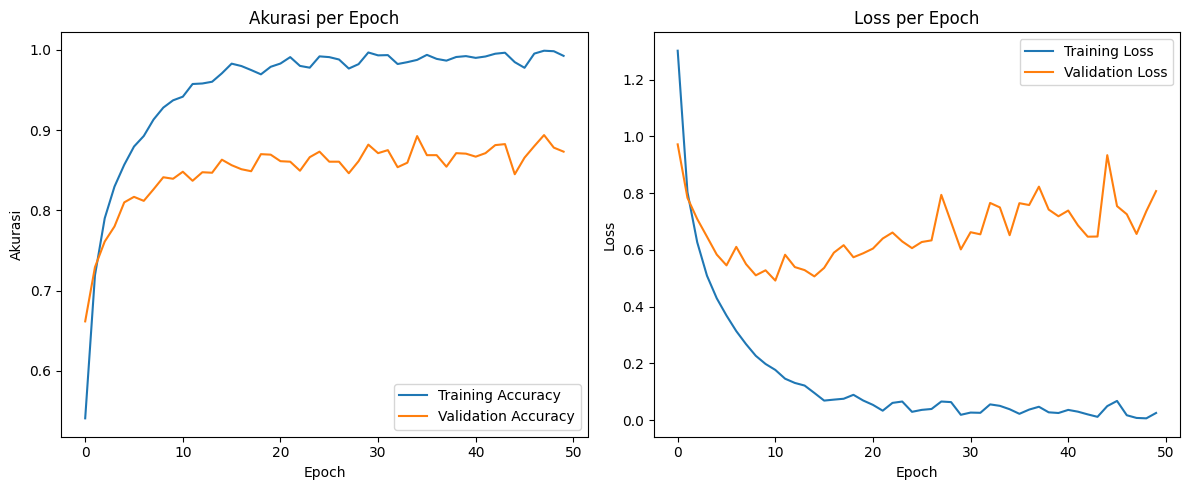

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


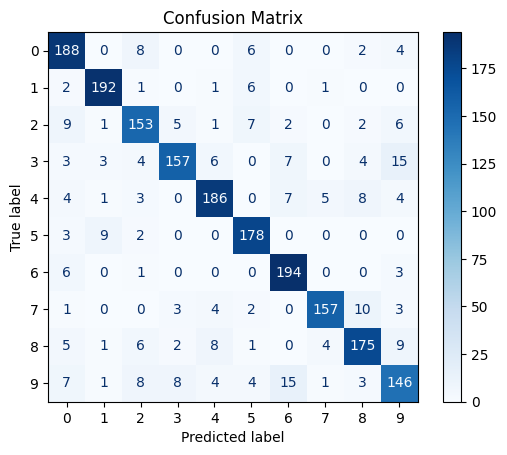

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# Konversi dari one-hot ke label indeks
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Kembalikan ke bentuk nama genre
y_pred_genres = encoder.inverse_transform(y_pred_labels)
y_true_genres = encoder.inverse_transform(y_true_labels)

# Tampilkan beberapa hasil prediksi
for i in range(10):
    print(f"Sample {i+1} → Asli: {y_true_genres[i]} | Prediksi: {y_pred_genres[i]}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Sample 1 → Asli: hiphop | Prediksi: reggae
Sample 2 → Asli: jazz | Prediksi: jazz
Sample 3 → Asli: blues | Prediksi: blues
Sample 4 → Asli: blues | Prediksi: blues
Sample 5 → Asli: metal | Prediksi: blues
Sample 6 → Asli: rock | Prediksi: jazz
Sample 7 → Asli: pop | Prediksi: pop
Sample 8 → Asli: country | Prediksi: disco
Sample 9 → Asli: country | Prediksi: country
Sample 10 → Asli: blues | Prediksi: blues


              precision    recall  f1-score   support

       blues       0.82      0.90      0.86       208
   classical       0.92      0.95      0.93       203
     country       0.82      0.82      0.82       186
       disco       0.90      0.79      0.84       199
      hiphop       0.89      0.85      0.87       218
        jazz       0.87      0.93      0.90       192
       metal       0.86      0.95      0.90       204
         pop       0.93      0.87      0.90       180
      reggae       0.86      0.83      0.84       211
        rock       0.77      0.74      0.75       197

    accuracy                           0.86      1998
   macro avg       0.86      0.86      0.86      1998
weighted avg       0.86      0.86      0.86      1998



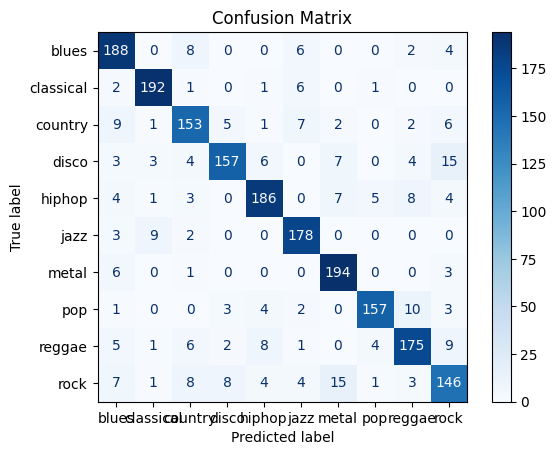

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification report
print(classification_report(y_true_genres, y_pred_genres))

# Confusion matrix
cm = confusion_matrix(y_true_genres, y_pred_genres, labels=encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


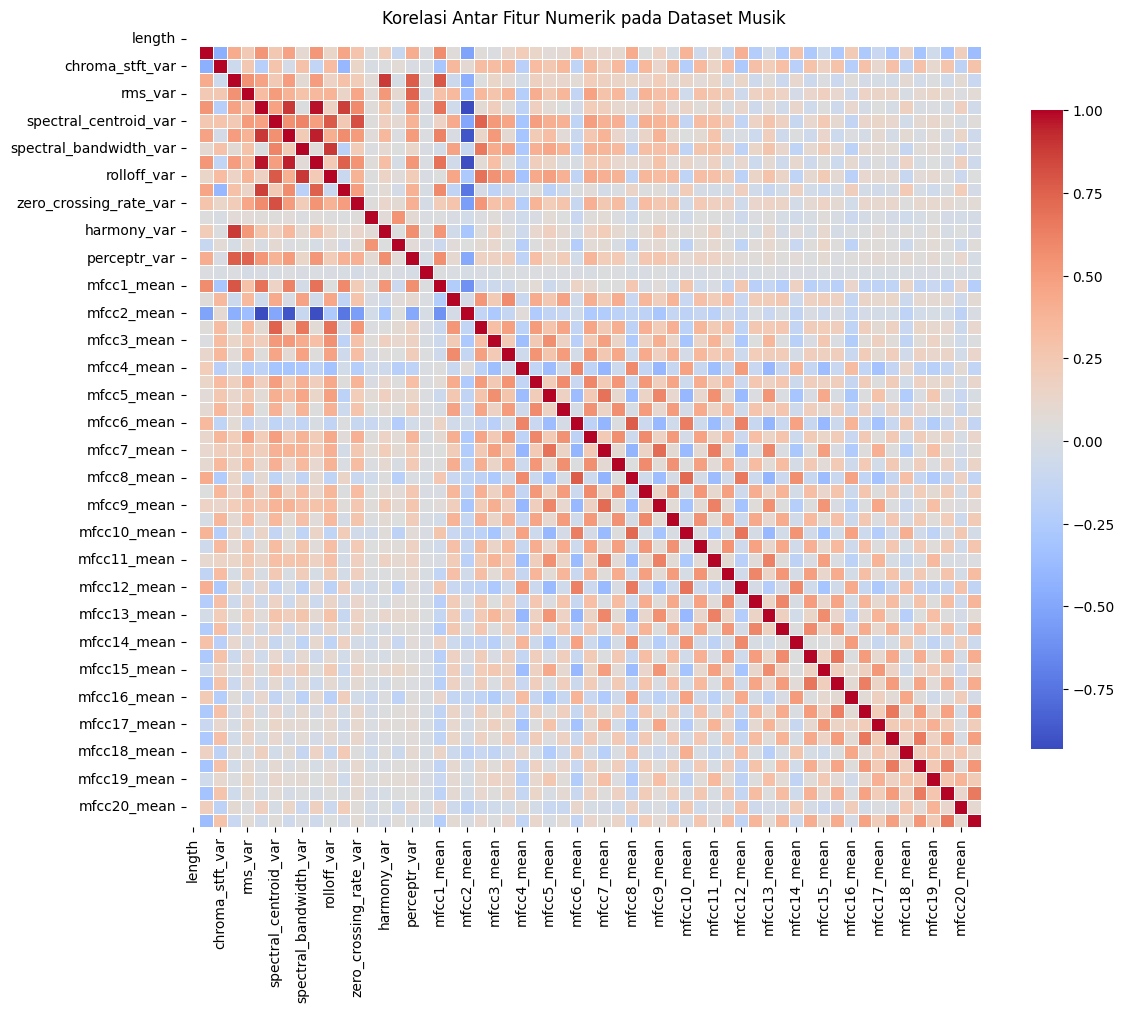

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("features_3_sec.csv")

# Buang kolom non-numerik seperti 'filename' dan 'label'
numerical_features = df.drop(columns=["filename", "label"])

# Hitung korelasi antar fitur numerik
corr = numerical_features.corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik pada Dataset Musik')
plt.tight_layout()
plt.show()


#**2. Untuk Musik 30 Second**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features_30_sec.csv to features_30_sec.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv("features_30_sec.csv")

# Pisahkan fitur dan label
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Encode label
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Bangun model ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy:.2f}, Loss: {loss:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2318 - loss: 2.1296 - val_accuracy: 0.4625 - val_loss: 1.6055
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4999 - loss: 1.4901 - val_accuracy: 0.5188 - val_loss: 1.2728
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6310 - loss: 1.0994 - val_accuracy: 0.6125 - val_loss: 1.0801
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.9126 - val_accuracy: 0.6438 - val_loss: 1.0184
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 0.7448 - val_accuracy: 0.6625 - val_loss: 0.9325
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8011 - loss: 0.6552 - val_accuracy: 0.7312 - val_loss: 0.8922
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.5586 - val_accuracy: 0.7000 - val_loss: 0.8565
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8753 - loss: 0.4361 - val_accuracy: 0.7250 - val_loss: 0.8508
Ep

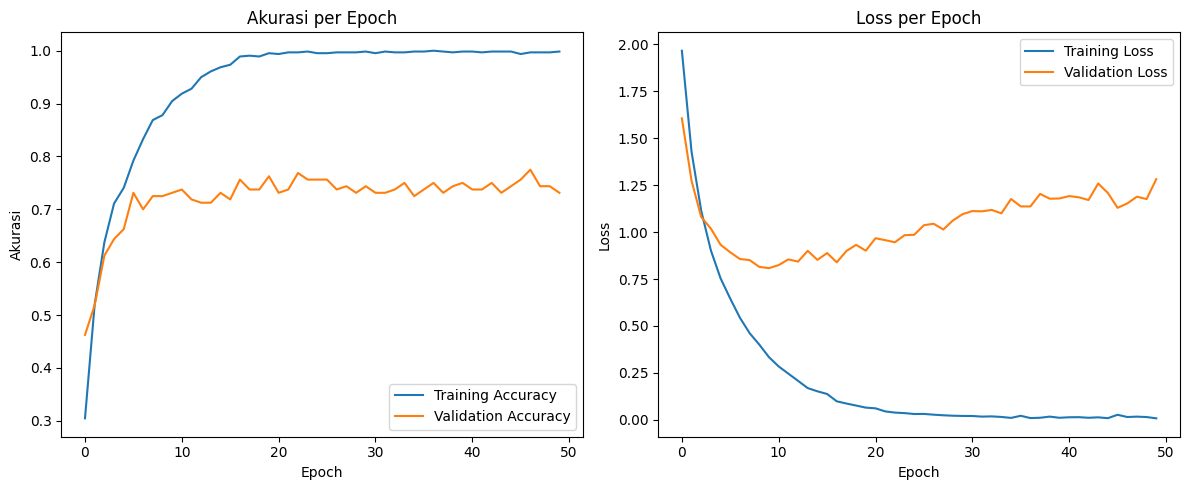

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


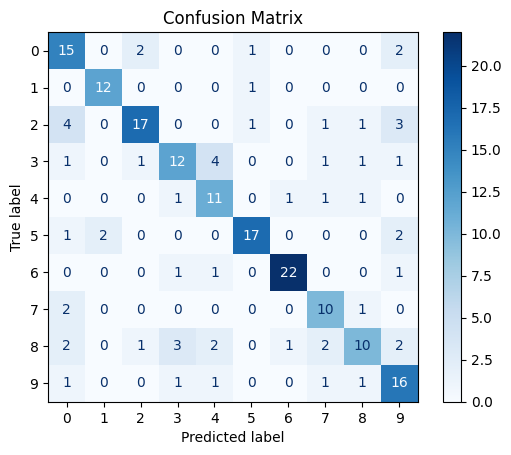

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# Konversi dari one-hot ke label indeks
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Kembalikan ke bentuk nama genre
y_pred_genres = encoder.inverse_transform(y_pred_labels)
y_true_genres = encoder.inverse_transform(y_true_labels)

# Tampilkan beberapa hasil prediksi
for i in range(10):
    print(f"Sample {i+1} → Asli: {y_true_genres[i]} | Prediksi: {y_pred_genres[i]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Sample 1 → Asli: jazz | Prediksi: rock
Sample 2 → Asli: pop | Prediksi: pop
Sample 3 → Asli: pop | Prediksi: pop
Sample 4 → Asli: metal | Prediksi: metal
Sample 5 → Asli: hiphop | Prediksi: hiphop
Sample 6 → Asli: metal | Prediksi: metal
Sample 7 → Asli: metal | Prediksi: metal
Sample 8 → Asli: jazz | Prediksi: jazz
Sample 9 → Asli: reggae | Prediksi: reggae
Sample 10 → Asli: classical | Prediksi: classical


              precision    recall  f1-score   support

       blues       0.58      0.75      0.65        20
   classical       0.86      0.92      0.89        13
     country       0.81      0.63      0.71        27
       disco       0.67      0.57      0.62        21
      hiphop       0.58      0.73      0.65        15
        jazz       0.85      0.77      0.81        22
       metal       0.92      0.88      0.90        25
         pop       0.62      0.77      0.69        13
      reggae       0.67      0.43      0.53        23
        rock       0.59      0.76      0.67        21

    accuracy                           0.71       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



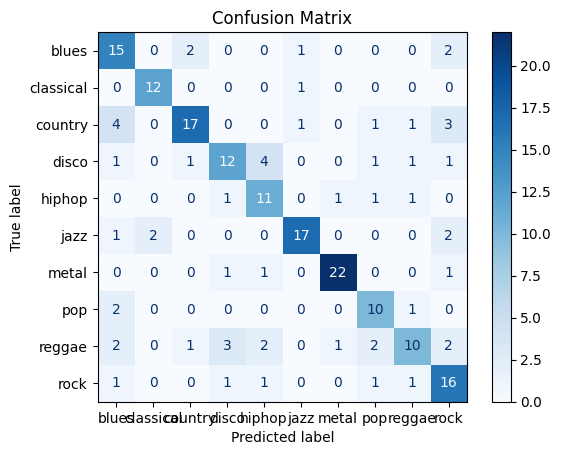

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification report
print(classification_report(y_true_genres, y_pred_genres))

# Confusion matrix
cm = confusion_matrix(y_true_genres, y_pred_genres, labels=encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


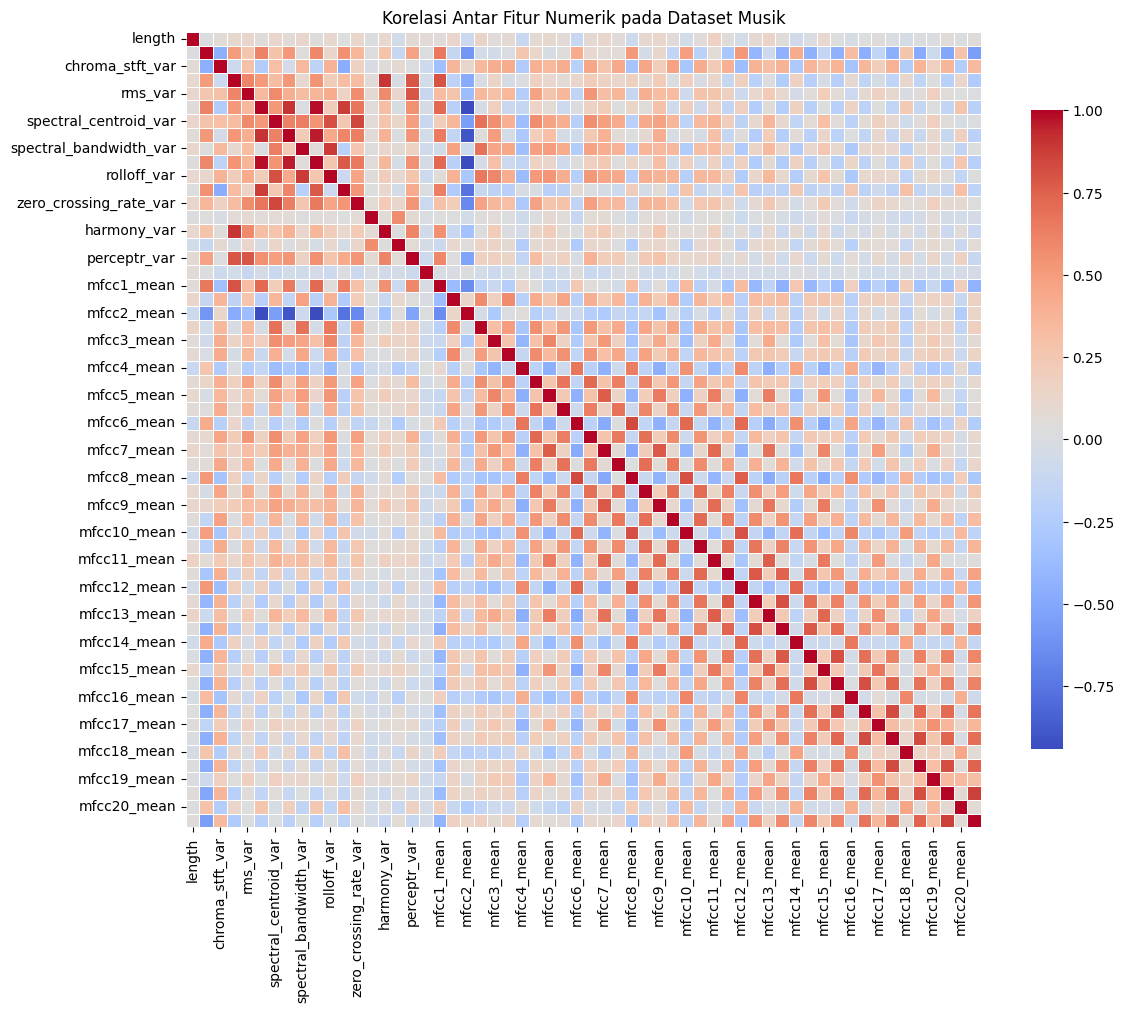

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("features_30_sec.csv")

# Buang kolom non-numerik seperti 'filename' dan 'label'
numerical_features = df.drop(columns=["filename", "label"])

# Hitung korelasi antar fitur numerik
corr = numerical_features.corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik pada Dataset Musik')
plt.tight_layout()
plt.show()
